In [29]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('life_expectancy.csv') 
df

,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)",...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.504050,15.180,...,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.806550,15.214,...,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.109050,15.223,...,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.411550,15.197,...,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.714050,15.178,...,29.789,105.7,222.214,119.122,103.092,14.689,51.4945,732.684,665.410,43.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,Zimbabwe,2017,8.061880,63.848396,8.461690,27.01627,0.673026,12.039037,11.853943,80.285,...,27.979,102.2,122.177,62.092,60.084,8.266,60.7095,464.979,-59.918,-4.054
6204,Zimbabwe,2018,8.178377,65.714286,8.585395,27.01627,0.821010,12.154317,11.981767,80.309,...,27.956,102.3,120.252,60.873,59.379,7.972,61.4141,468.496,-59.918,-3.972
6205,Zimbabwe,2019,8.296558,65.428571,8.710909,28.76901,0.747610,12.270700,12.110969,80.339,...,27.934,102.3,123.744,63.152,60.592,8.043,61.2925,469.639,-59.918,-3.895
6206,Zimbabwe,2020,8.296558,65.428571,8.710909,28.76901,0.708562,12.270700,12.110969,78.980,...,27.916,102.4,127.551,66.267,61.284,8.132,61.1242,471.214,-29.955,-1.910


In [3]:
column_list = df.columns.to_list()
for i in column_list:
    print(i)

Country
Year
Mean Years of Schooling, female (years)
Share of seats in parliament, male (% held by men)
Mean Years of Schooling (years)
Inequality in income
Carbon dioxide emissions per capita (production) (tonnes)
Expected Years of Schooling, male (years)
Expected Years of Schooling (years)
Labour force participation rate, female (% ages 15 and older)
Population with at least some secondary education, female (% ages 25 and older)
Expected Years of Schooling, female (years)
Adolescent Birth Rate (births per 1,000 women ages 15-19)
Material footprint per capita (tonnes)
Mean Years of Schooling, male (years)
Population with at least some secondary education, male (% ages 25 and older)
Share of seats in parliament, female (% held by women)
Inequality in eduation
Gender Development Index (value)
Coefficient of human inequality
Labour force participation rate, male (% ages 15 and older)
Human Development Index (value)
Gross National Income Per Capita (2017 PPP$)
Total Population, as of 1 Ja

In [4]:
df.columns = df.columns.str.lower()
# Dictionary mapping old column names to new column names
column_rename_dict = {
    'country': 'country',
    'year': 'year',
    'mean years of schooling, female (years)': 'mean_years_of_schooling_female',
    'share of seats in parliament, male (% held by men)': 'share_of_male_seats_in_parliament',
    'mean years of schooling (years)': 'mean_years_of_schooling',
    'inequality in income': 'income_inequality',
    'carbon dioxide emissions per capita (production) (tonnes)': 'co2_emissions_per_capita_tonnes',
    'expected years of schooling, male (years)': 'expected_years_of_schooling_male',
    'expected years of schooling (years)': 'expected_years_of_schooling',
    'labour force participation rate, female (% ages 15 and older)': 'female_labour_force_participation_rate',
    'population with at least some secondary education, female (% ages 25 and older)': 'female_population_with_some_secondary_education',
    'expected years of schooling, female (years)': 'expected_years_of_schooling_female',
    'adolescent birth rate (births per 1,000 women ages 15-19)': 'adolescent_birth_rate_per_1000_women_ages_15_19',
    'material footprint per capita (tonnes)': 'material_footprint_per_capita_tonnes',
    'mean years of schooling, male (years)': 'mean_years_of_schooling_male',
    'population with at least some secondary education, male (% ages 25 and older)': 'male_population_with_some_secondary_education',
    'share of seats in parliament, female (% held by women)': 'share_of_female_seats_in_parliament',
    'inequality in eduation': 'education_inequality',
    'gender development index (value)': 'gender_development_index',
    'coefficient of human inequality': 'coefficient_of_human_inequality',
    'labour force participation rate, male (% ages 15 and older)': 'male_labour_force_participation_rate',
    'human development index (value)': 'human_development_index',
    'gross national income per capita (2017 ppp$)': 'gross_national_income_per_capita_2017_ppp',
    'total population, as of 1 january (thousands)': 'total_population_as_of_january_1st_thousands',
    'total population, as of 1 july (thousands)': 'total_population_as_of_july_1st_thousands',
    'male population, as of 1 july (thousands)': 'male_population_as_of_july_1st_thousands',
    'female population, as of 1 july (thousands)': 'female_population_as_of_july_1st_thousands',
    'population density, as of 1 july (persons per square km)': 'population_density_as_of_july_1st_persons_per_square_km',
    'population sex ratio, as of 1 july (males per 100 females)': 'population_sex_ratio_as_of_july_1st_males_per_100_females',
    'median age, as of 1 july (years)': 'median_age_as_of_july_1st_years',
    'natural change, births minus deaths (thousands)': 'natural_change_births_minus_deaths_thousands',
    'rate of natural change (per 1,000 population)': 'rate_of_natural_change_per_1000_population',
    'population change (thousands)': 'population_change_thousands',
    'population growth rate (percentage)': 'population_growth_rate_percentage',
    'population annual doubling time (years)': 'population_annual_doubling_time_years',
    'births (thousands)': 'births_thousands',
    'births by women aged 15 to 19 (thousands)': 'births_by_women_aged_15_to_19_thousands',
    'crude birth rate (births per 1,000 population)': 'crude_birth_rate_births_per_1000_population',
    'total fertility rate (live births per woman)': 'total_fertility_rate_live_births_per_woman',
    'net reproduction rate (surviving daughters per woman)': 'net_reproduction_rate_surviving_daughters_per_woman',
    'mean age childbearing (years)': 'mean_age_of_childbearing_years',
    'sex ratio at birth (males per 100 female births)': 'sex_ratio_at_birth_males_per_100_female_births',
    'total deaths (thousands)': 'total_deaths_thousands',
    'male deaths (thousands)': 'male_deaths_thousands',
    'female deaths (thousands)': 'female_deaths_thousands',
    'crude death rate (deaths per 1,000 population)': 'crude_death_rate_deaths_per_1000_population',
    'life expectancy at birth, both sexes (years)': 'life_expectancy_at_birth_both_sexes_years',
    'live births surviving to age 1 (thousands)': 'live_births_surviving_to_age_1_thousands',
    'net number of migrants (thousands)': 'net_number_of_migrants_thousands',
    'net migration rate (per 1,000 population)': 'net_migration_rate_per_1000_population'
}

# Rename columns
df_new = df.copy()
df_new = df.rename(columns=column_rename_dict, errors='raise')


In [5]:
df_new.head()

,country,year,mean_years_of_schooling_female,share_of_male_seats_in_parliament,mean_years_of_schooling,income_inequality,co2_emissions_per_capita_tonnes,expected_years_of_schooling_male,expected_years_of_schooling,female_labour_force_participation_rate,...,mean_age_of_childbearing_years,sex_ratio_at_birth_males_per_100_female_births,total_deaths_thousands,male_deaths_thousands,female_deaths_thousands,crude_death_rate_deaths_per_1000_population,life_expectancy_at_birth_both_sexes_years,live_births_surviving_to_age_1_thousands,net_number_of_migrants_thousands,net_migration_rate_per_1000_population
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.50405,15.180,...,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.80655,15.214,...,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.10905,15.223,...,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.41155,15.197,...,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.71405,15.178,...,29.789,105.7,222.214,119.122,103.092,14.689,51.4945,732.684,665.410,43.986


In [14]:
df_new.isnull().sum().to_csv('desc_groupby_country.csv')



In [22]:
label_encoder_df = LabelEncoder()

df_new["country"] = label_encoder_df.fit_transform(df_new["country"])
y_col = ["life_expectancy_at_birth_both_sexes_years"]
x_col =[col for col in df_new.columns.to_list() if col not in y_col]

print(x_col)



['country', 'year', 'mean_years_of_schooling_female', 'share_of_male_seats_in_parliament', 'mean_years_of_schooling', 'income_inequality', 'co2_emissions_per_capita_tonnes', 'expected_years_of_schooling_male', 'expected_years_of_schooling', 'female_labour_force_participation_rate', 'female_population_with_some_secondary_education', 'expected_years_of_schooling_female', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'material_footprint_per_capita_tonnes', 'mean_years_of_schooling_male', 'male_population_with_some_secondary_education', 'share_of_female_seats_in_parliament', 'education_inequality', 'gender_development_index', 'coefficient_of_human_inequality', 'male_labour_force_participation_rate', 'human_development_index', 'gross_national_income_per_capita_2017_ppp', 'total_population_as_of_january_1st_thousands', 'total_population_as_of_july_1st_thousands', 'male_population_as_of_july_1st_thousands', 'female_population_as_of_july_1st_thousands', 'population_density_as_of_july_1st_

In [28]:

X_train, X_test, y_train, y_test = train_test_split(df_new[x_col], df_new[y_col], test_size=0.2, random_state=42, stratify=df_new['country'])



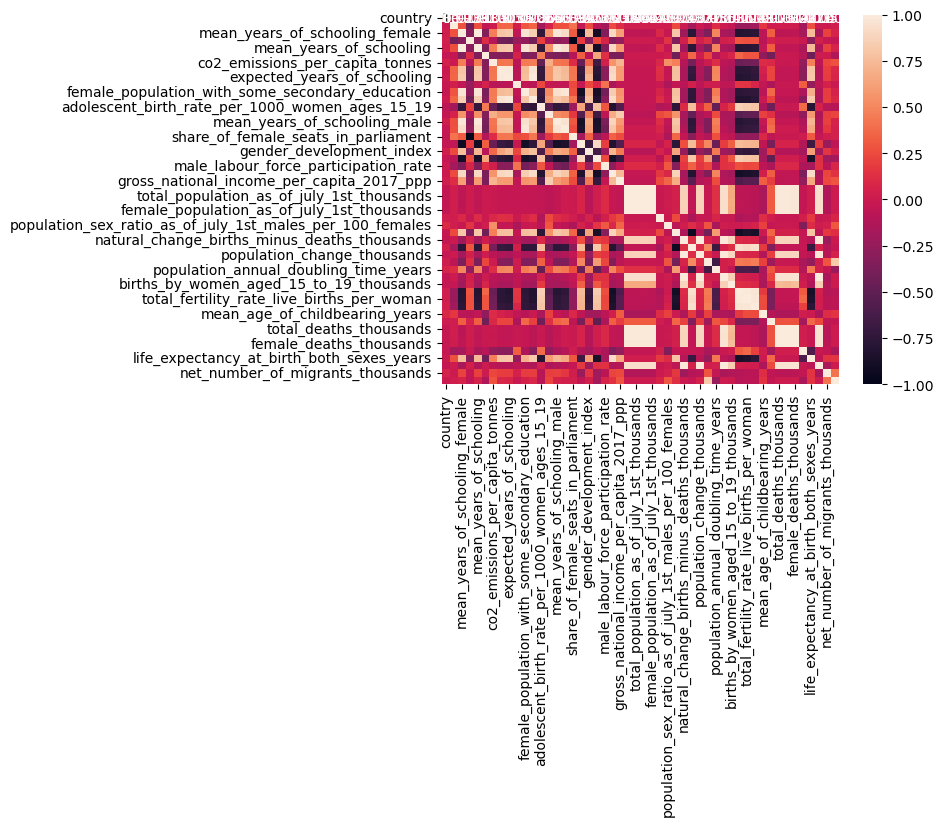

In [36]:
correlation_mat = df_new.corr()

sns.heatmap(correlation_mat, annot=True)


In [44]:
df_new.columns.shape

(50,)

In [58]:
corrs = {x: df_new[x].corr(df_new[y_col[0]], method='pearson') for x in x_col}
corrs_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Correlation'])
corrs_df = corrs_df.sort_values(by='Correlation', ascending=False)

corrs_df

,Correlation
human_development_index,0.918730
expected_years_of_schooling_female,0.820617
expected_years_of_schooling,0.806646
expected_years_of_schooling_male,0.789946
median_age_as_of_july_1st_years,0.789246
mean_years_of_schooling_female,0.747716
mean_years_of_schooling,0.737860
mean_years_of_schooling_male,0.725305
female_population_with_some_secondary_education,0.689039
male_population_with_some_secondary_education,0.652450
